<a href="https://colab.research.google.com/github/HarshithRKumar/Machine-Learning-Models/blob/main/Outliers_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
column=['date','street','city','statezip','country']
for col in column:
  df[col]=encoder.fit_transform(df[col])
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0
5,0,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,3521,35,54,0
6,0,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2286,31,31,0
7,0,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,2038,21,23,0
8,0,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,3369,27,27,0
9,0,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,3846,35,54,0


In [ ]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,36.135217,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2265.385870,25.674348,38.743696,0.0
std,19.708177,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1307.591795,11.982721,20.919517,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,19.000000,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1132.750000,17.000000,21.000000,0.0
50%,38.000000,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2263.500000,32.000000,41.000000,0.0
75%,53.000000,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3400.250000,35.000000,56.000000,0.0
max,69.000000,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4524.000000,43.000000,76.000000,0.0


<Axes: ylabel='sqft_living'>

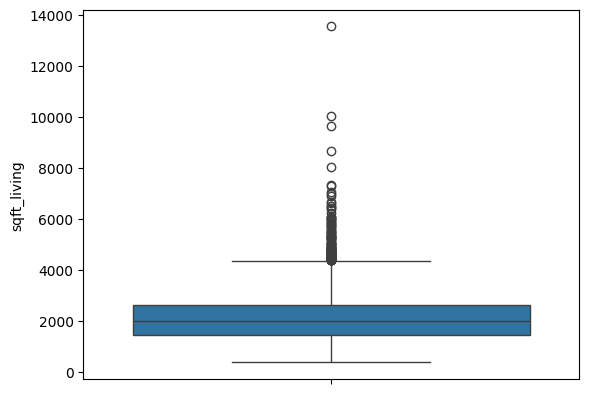

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['sqft_living'])

/tmp/ipython-input-576498196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'])


<Axes: xlabel='sqft_living', ylabel='Density'>

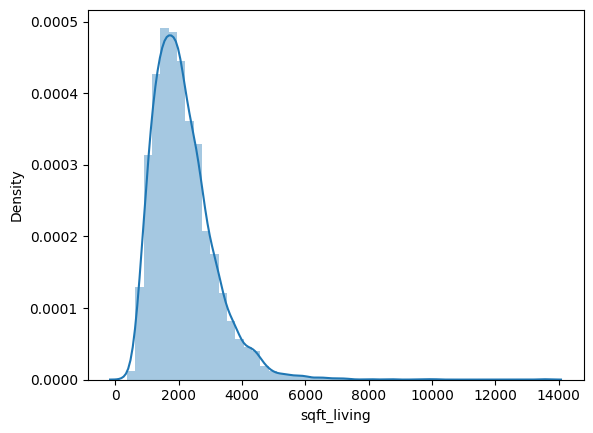

In [ ]:
sns.distplot(df['sqft_living'])

In [ ]:
##IQR method

for col in df.select_dtypes(include=['int64','float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df.loc[(df[col] < lower_limit) & (df[col] > upper_limit), col]

    print(f"\nColumn: {col}")
    print("Lower Limit:", lower_limit, " Upper Limit:", upper_limit)
    print("Outliers:\n", len(outliers))


Column: date
Lower Limit: -32.0  Upper Limit: 104.0
Outliers:
 Series([], Name: date, dtype: int64)

Column: price
Lower Limit: -175256.25  Upper Limit: 1153093.75
Outliers:
 1       2.384000e+06
11      1.400000e+06
14      1.200000e+06
99      1.395000e+06
122     2.280000e+06
            ...     
4348    2.199900e+06
4350    2.659000e+07
4465    2.560498e+06
4467    1.337044e+06
4572    1.288333e+06
Name: price, Length: 240, dtype: float64

Column: bedrooms
Lower Limit: 1.5  Upper Limit: 5.5
Outliers:
 92      6.0
122     7.0
170     6.0
241     9.0
252     7.0
       ... 
4357    6.0
4442    1.0
4509    6.0
4556    1.0
4572    6.0
Name: bedrooms, Length: 118, dtype: float64

Column: bathrooms
Lower Limit: 0.625  Upper Limit: 3.625
Outliers:
 122     8.00
143     4.25
217     4.00
223     3.75
227     5.00
        ... 
4523    4.50
4528    5.00
4558    4.25
4572    4.50
4575    6.25
Name: bathrooms, Length: 141, dtype: float64

Column: sqft_living
Lower Limit: -280.0  Upper Limit: 

In [ ]:
# trimming - delete outlier data
new_df=df.loc[(df[col] < upper_limit) & (df[col] > lower_limit)]
print("before removing outlier:",len(df))
print("after removing outlier:",len(new_df))
print("outliers:",len(df)-len(outliers))


before removing outlier: 4600
after removing outlier: 0
outliers: 4600


<Axes: >

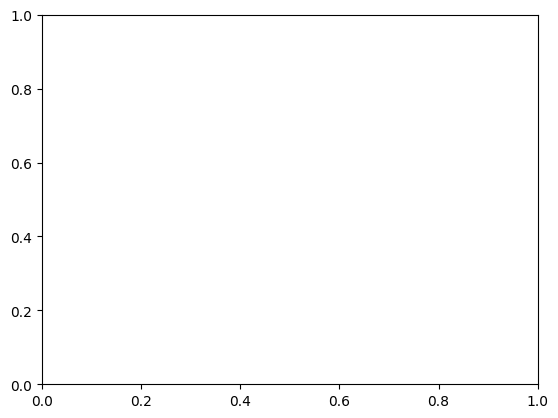

In [ ]:
sns.boxplot(new_df['sqft_living'])

In [ ]:
# capping - change the outlier values to upper or lower limit values
new_df=df.copy()
new_df.loc[(new_df['sqft_living'] > upper_limit),"sqft_living"] = upper_limit
new_df.loc[(new_df['sqft_living'] < lower_limit),"sqft_living"] = lower_limit


<Axes: ylabel='sqft_living'>

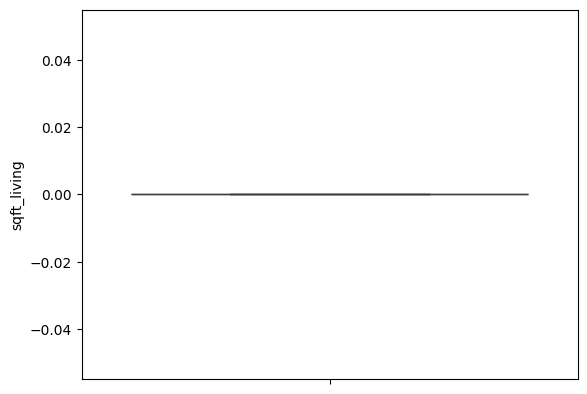

In [ ]:
sns.boxplot(new_df['sqft_living'])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
x=df.drop("price",axis=1)
y=df["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test= std_scaler.transform(x_test)

model=LinearRegression()
model.fit(x_train,y_train)

pred=model.predict(x_test)

r2=r2_score(y_test,pred)
print("lr r2 score:",r2)

lr r2 score: 0.03304504390209173
